In [1]:
from dataloader import *
from VAE import *
from scores import *
from train import *
from cal_score import cal_bleu, cal_gaussian

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import random

In [2]:
model = torch.load('./models/model_mono_2335_2110_best')
model

CondVAE(
  (encoder_condition_embedding): Embedding(4, 8)
  (encoder): EncoderRNN(
    (embedding): Embedding(28, 264)
    (lstm): LSTM(264, 264)
  )
  (fc_mu): Linear(in_features=264, out_features=32, bias=True)
  (fc_logvar): Linear(in_features=264, out_features=32, bias=True)
  (fc_extend_latent): Linear(in_features=32, out_features=256, bias=True)
  (decoder_condition_embedding): Embedding(4, 8)
  (decoder): DecoderRNN(
    (embedding): Embedding(28, 264)
    (lstm): LSTM(264, 264)
    (out): Linear(in_features=264, out_features=28, bias=True)
  )
)

In [3]:
cal_bleu(model, print_result=True)

---------------------------------
input :  abandon
target:  abandoned
pred  :  annowed
---------------------------------
input :  abet
target:  abetting
pred  :  abetting
---------------------------------
input :  begin
target:  begins
pred  :  becongs
---------------------------------
input :  expend
target:  expends
pred  :  expends
---------------------------------
input :  sent
target:  sends
pred  :  sees
---------------------------------
input :  split
target:  splitting
pred  :  spianing
---------------------------------
input :  flared
target:  flare
pred  :  flare
---------------------------------
input :  functioning
target:  function
pred  :  finish
---------------------------------
input :  functioning
target:  functioned
pred  :  finhished
---------------------------------
input :  healing
target:  heals
pred  :  heaes
Average BLEU-4 score =  0.38316243675744016


0.38316243675744016

In [4]:
score = cal_gaussian(model, print_result =True)

['presupt', 'presupts', 'presupting', 'presupted']
['abage', 'abages', 'abaging', 'abled']
['puff', 'puffs', 'puffing', 'puffed']
['misquate', 'misquates', 'misquating', 'misquated']
['mutter', 'mutters', 'muttering', 'muttered']
['appease', 'appeases', 'appeasing', 'appeased']
['inhibit', 'inhibits', 'inhibiting', 'inhibedted']
['jingle', 'jingles', 'jingleignn', 'jingled']
['danger', 'dangers', 'dangering', 'dangered']
['disobey', 'disobets', 'disobeting', 'disobeted']
['volven', 'volvents', 'volvishing', 'violdi']
['blurt', 'blurts', 'blurting', 'blected']
['besower', 'besowers', 'besowering', 'besowered']
['ereact', 'ereacts', 'ereacting', 'ereacted']
['discuss', 'discusses', 'discussing', 'discussed']
['investit', 'investises', 'investiting', 'investited']
['disobey', 'disobeys', 'disobeying', 'disobeyed']
['measure', 'measures', 'measuring', 'measured']
['drigge', 'driggles', 'drigning', 'dragged']
['back', 'backs', 'backing', 'backed']
['crank', 'cranks', 'cranking', 'cranked']


In [5]:
ce_list = torch.load('./loss_lists/ce_loss/ce_mono_0816')
kld_list = torch.load('./loss_lists/kld_loss/kld_mono_0816')
bleu = torch.load('./loss_lists/bleu_list/bleu_mono_0816')

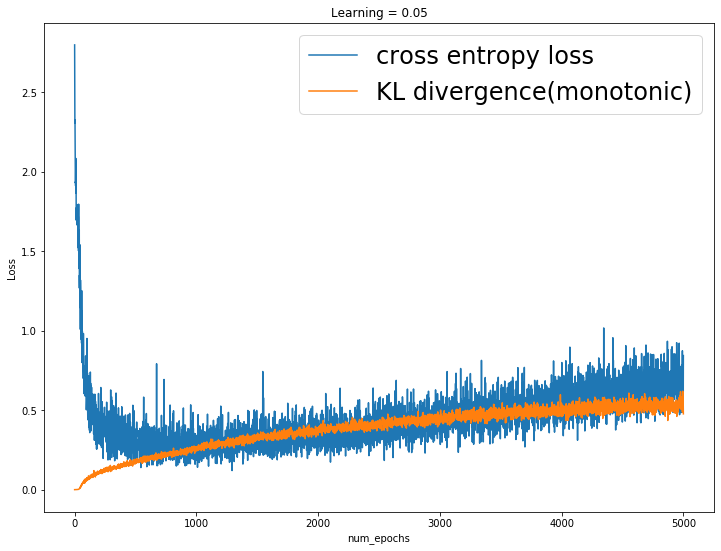

In [6]:
plt.figure(figsize=(12,9))
plt.title('Learning = 0.05')
plt.plot(ce_list, label='cross entropy loss')
plt.plot(kld_list, label='KL divergence(monotonic)')
plt.xlabel('num_epochs')
plt.ylabel('Loss')
plt.legend(fontsize=24)
plt.show()

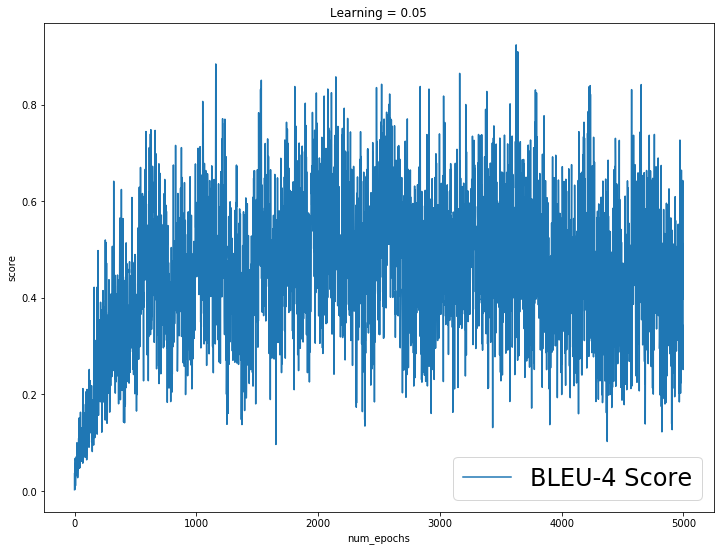

In [7]:
plt.figure(figsize=(12,9))
plt.title('Learning = 0.05')
plt.plot(bleu, label='BLEU-4 Score')
plt.xlabel('num_epochs')
plt.ylabel('score')
plt.legend(fontsize=24)
plt.show()